In [1]:
import numpy as np
import matplotlib.pyplot as plt
import uproot
from concurrent.futures import ThreadPoolExecutor
import os
import glob
import re
from tqdm import tqdm
import imageio
import open3d as o3d
from scipy.ndimage import gaussian_filter

import matplotlib.animation as animation

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:

files=glob.glob("./build/dump/data_root/*root")

sorted_files = sorted(files, key=lambda x: int(re.search(r'\d+', x).group()))

#sorted_files = sorted(files, key=lambda x: int(re.search(r'\d+', x).group()))

In [3]:
for i,item in enumerate(sorted_files):
    print(i,item)

sorted_files=[sorted_files[0]]

print(sorted_files)

0 ./build/dump/data_root/output0.root
1 ./build/dump/data_root/output109.root
['./build/dump/data_root/output0.root']


In [4]:
dump=[]
labels=[]


for file in sorted_files:
    labels.append(file)
    workers=8

    decompression_executor = ThreadPoolExecutor(max_workers=workers)
    interpretation_executor = ThreadPoolExecutor(max_workers=workers)


    with uproot.open(file,num_workers=workers,
                     decompression_executor=decompression_executor,
                     interpretation_executor=interpretation_executor) as file:
        print('start_loading')
        tree = file['B4;1']
        braunches=['Edep']
        data=tree.arrays( braunches,library="np")['Edep']


        # Clean up executors
    decompression_executor.shutdown()
    interpretation_executor.shutdown()

    dump.append(data)


start_loading


In [5]:
data=dump[0]

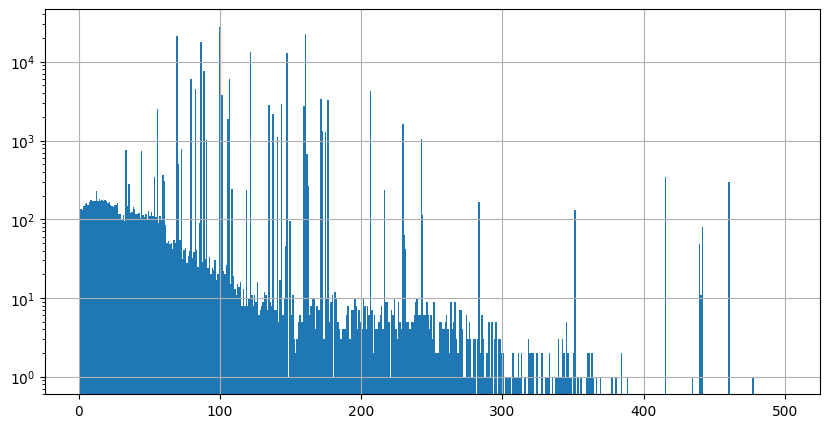

In [14]:
plt.figure(figsize=(10,5))
a=plt.hist(data,bins=np.linspace(1,500,500))
plt.yscale('log')
plt.grid(True)

In [7]:
len(data)

193901

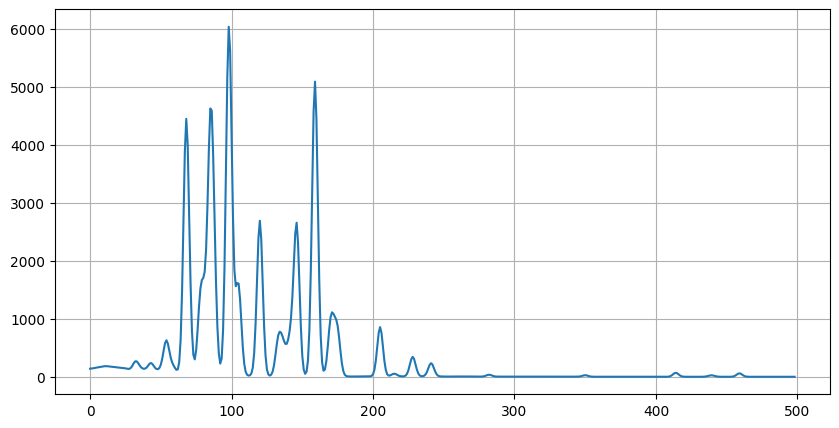

In [22]:
signal=gaussian_filter(a[0],sigma=2)
plt.figure(figsize=(10,5))
plt.plot(signal)
#plt.yscale('log')
plt.grid(True)